In [1]:
#useful packages
import numpy as np
from numpy import linalg as LA
import math as mt
import os
from matplotlib.image import imread
import matplotlib.pyplot as plt
from matplotlib import rcParams # for changing default values
import scipy.io as sio
import scipy.optimize
from scipy.optimize import minimize
import timeit
import torch
import random

### Examples of numpy from Mechanics of solids

In [2]:
v = np.array([1., 2., 3.])
A = np.array([[1., 2., 3.], [2., 4., 5.], [3., 5., 6.]])
#print(A)

# dot product
v @ v
v.dot(v)
np.inner(v, v)
np.einsum('i,i', v, v)

# vector product
w=np.array([3.,4.,5.])
c=np.cross(v,w)

# open product
# vectors
np.outer(v, v) # attention, if you use np.outer on a multi-dim array, it flattens it to a vector
np.einsum('i,j', v, v)
# higher order tensors
np.einsum('ij,kl', A, A)

#2nd order unit tensor
delta=np.eye(3)

# single contraction
# A \cdot v
A @ v
A.dot(v)
np.inner(A, v)
np.einsum('ij,j', A, v)
# c \cdot A
v @ A
v.dot(A)
# don’t use np.inner(v, A)!
np.einsum('i,ij', v, A)

# double contraction
# A : A
np.tensordot(A, A, 2)
np.einsum('ij,ij', A, A)

# trace
np.trace(A)
np.einsum('ii', A)

# determinant
np.linalg.det(A)

# matrix power
# A^3
np.linalg.matrix_power(A, 3)

# eigenvalue problem
la, n=np.linalg.eig(A)

# transpose of matrix
A.T

# inverse of matrix
np.linalg.inv(A)

# solve equation system A x= v
np.linalg.inv(A)@v
np.linalg.solve(A,v) #quicker



array([1.00000000e+00, 1.66533454e-16, 0.00000000e+00])

### Examples of plotting

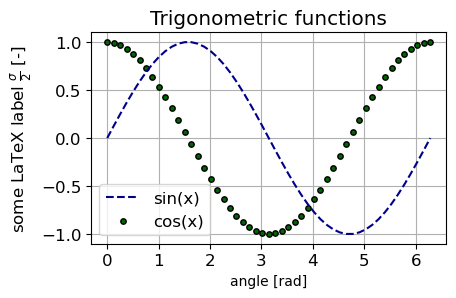

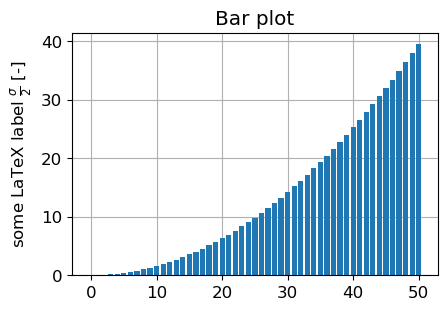

In [3]:

# generate some data
x = np.linspace(0, 2*np.pi, 51)
y1 = np.sin(x)
y2 = np.cos(x)

# set all fontsizes to 12
rcParams["font.size"] = 12
rcParams["axes.axisbelow"] = True # make sure grid is behind plots

# choose a figure size
size_in_inch = (12.0/2.54, 8.0/2.54) # 12cm x 8cm
# Create a figure with one subplot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=size_in_inch)  # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

# Add Labels to the Axis
ax.set_xlabel('angle [rad]', fontsize=10)    # https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html
ax.set_ylabel(r'some LaTeX label $\frac{\sigma}{2}$ [-]')
ax.set_title('Trigonometric functions')

# Background grid
ax.grid(visible=True)

# plot sine and cosine curves
ax.plot(x, y1, label='sin(x)', linestyle='--', color='darkblue')    # https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html
ax.scatter(x, y2, s=15, marker='o', facecolors='darkgreen', edgecolors='black', label='cos(x)')     # https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html

# Always use a Legend if you have several plots within a single Axis
ax.legend(loc='best')   # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html

# nicer layout
fig.tight_layout()  # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html

# Make sure to use a sufficient resolution when saving pixel graphics
fig.savefig('example_python.png', dpi=600)     # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html
# Or better use vector graphics (e.g. .eps, .svg, .pdf)
fig.savefig('example_python.svg') # Word likes .svg, Latex prefers .eps or .pdf

# display the figure 
plt.show()

#bar example
z=x**2
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=size_in_inch)  # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
plt.bar(range(len(z)), z)
ax.set_ylabel(r'some LaTeX label $\frac{\sigma}{2}$ [-]')
ax.set_title('Bar plot')
ax.grid(visible=True)

## Example supervised learning, regression: House Price Prediction

You are given a dataset containing information about house prices and the number of rooms. Your task is to build a linear regression model that can predict the price of a house based on the number of rooms.

Dataset:

* Input:
rooms = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

* Output:
prices = np.array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550])




Feature: Number of rooms in a house (rooms)
Target: Price of the house (prices)
Your goal is to train a model using the provided dataset and make accurate predictions on new data.

## Solution procedure:

* Load the dataset of house prices and the corresponding number of rooms.

* Normalize the feature (number of rooms) to improve convergence.

* Initialize the model parameters (slope and intercept) to zero.

* Set the learning rate and the number of iterations for the gradient descent algorithm.

* Perform gradient descent iteratively to update the parameters and minimize the prediction error.

* Evaluate the trained model by making predictions on new data.

* Use the trained model to predict the price of a house with a specific number of rooms.

Your solution should provide the predicted price for a given number of rooms based on the trained linear regression model.

Prediction: [224.99028647]


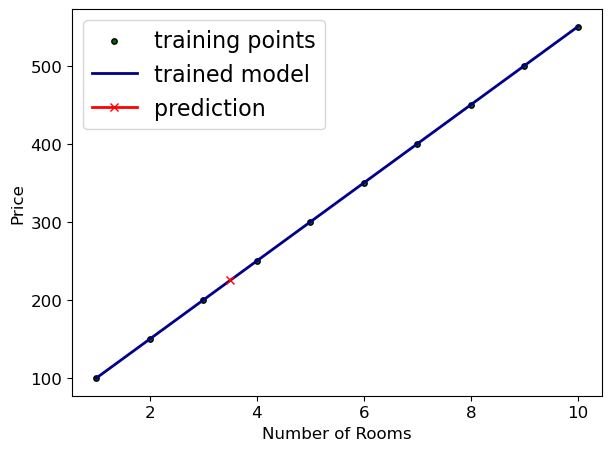

In [4]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Load the dataset
rooms = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])  # Number of rooms
prices = np.array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550])  # Corresponding prices

# Create a plot
fig, ax = plt.subplots()
rcParams["font.size"] = 16

# Plot the data points
#
ax.scatter(rooms, prices,  s=15, marker='o', facecolors='darkgreen', edgecolors='black', label='training points')
ax.set_xlabel(r'Number of Rooms')
ax.set_ylabel(r'Price')
fig.tight_layout()

# Normalize the features (rooms)
rooms_normalized = (rooms - np.mean(rooms)) / np.std(rooms)

# Initialize the model parameters (slope and intercept)
slope = 0
intercept = 0

# Set the learning rate and number of iterations for gradient descent
learning_rate = 0.01
num_iterations = 1000

# Perform gradient descent
for iteration in range(num_iterations):
    # Calculate predictions
    predictions = slope * rooms_normalized + intercept

    # Calculate the error
    error = prices - predictions

    # Update the parameters using gradient descent
    slope += learning_rate * np.dot(error, rooms_normalized) / len(rooms)
    intercept += learning_rate * np.sum(error) / len(rooms)

# Make a prediction for a new number of rooms
new_rooms = np.array([3.5])
new_rooms_normalized = (new_rooms - np.mean(rooms)) / np.std(rooms)
prediction = slope * new_rooms_normalized + intercept

# Print the prediction
print("Prediction:", prediction)

# Plot the prediction point
ax.plot(rooms, slope * (rooms - np.mean(rooms)) / np.std(rooms) + intercept, linewidth=2.0, label='trained model', linestyle='-', color='darkblue',)
ax.plot(new_rooms, prediction, linewidth=2.0,label='prediction', marker='x', linestyle='-', color='red')
ax.legend(loc='best')  
# Display the plot
plt.show()


### Example unsupervised learning: K-means Clustering

You are given a dataset of 2D points and your task is to perform K-means clustering to group these points into K distinct clusters.

Dataset:

Feature: 2D points (data)
Your goal is to apply the K-means algorithm to identify K cluster centers and assign each point to its nearest cluster.

Formally, you need to:

Generate or obtain a dataset of 2D points.
Initialize K cluster centers randomly.
Specify the number of iterations for the K-means algorithm.
Iterate over the specified number of iterations:
Assign each point to the nearest cluster center based on the Euclidean distance.
Update the cluster centers by computing the mean of the points in each cluster.
Output the final cluster centers.
Your solution should provide the final cluster centers discovered by the K-means algorithm

Cluster centers:
[[-1.24564143  0.1270588 ]
 [-0.41992777 -1.02783364]
 [ 1.23317084  1.1709382 ]
 [-0.09829719  0.95660335]
 [ 0.85951949 -0.4404991 ]]


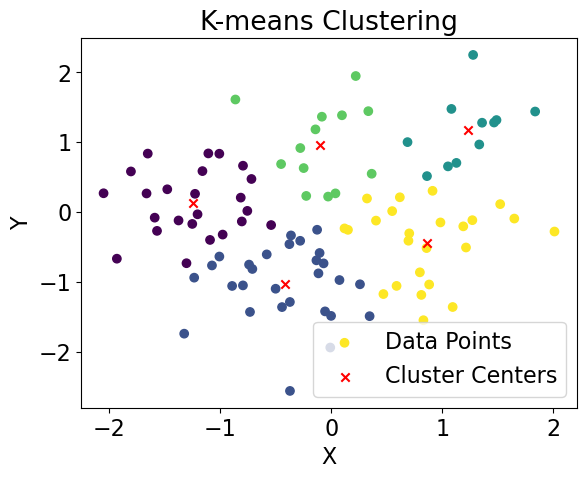

In [5]:

# Generate random 2D data
no_points = 100  # Number of data points
data = np.random.randn(no_points, 2)  # Generate random 2D data points

# Initialize cluster centers
no_clusters = 5  # Number of clusters
centers = np.random.randn(no_clusters, 2)  # Initialize random cluster centers

# Perform K-means clustering
num_iterations = 30  # Number of clustering iterations
distances = np.zeros((no_points, no_clusters))  # Initialize distances matrix
for _ in range(num_iterations):
    # Assign points to the nearest cluster center
    for i in range(no_points):
        for j in range(no_clusters):
            distances[i, j] = np.linalg.norm(data[i, :] - centers[j, :])
    labels = np.argmin(distances, axis=1)  # Choose the nearest cluster for each point

    # Update cluster centers
    for i in range(no_clusters):
        centers[i] = np.mean(data[labels == i], axis=0)  # Update center as mean of assigned points

# Print the final cluster centers
print("Cluster centers:")
print(centers)

# Assign points to the nearest cluster center using a vectorized approach
distances = np.linalg.norm(data[:, np.newaxis, :] - centers, axis=-1)
labels = np.argmin(distances, axis=1)  # Choose the nearest cluster for each point

# Plot the data points and clusters
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', label='Data Points')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', label='Cluster Centers')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-means Clustering')
plt.legend()
plt.show()



## Reinforcement learning: Frozen lake
You are in a gridworld represented by a 4x4 grid, also known as the FrozenLake environment. The goal is to navigate from the starting point (S) to the goal (G) while avoiding holes (H) that lead to failure. The grid contains slippery (frozen) tiles (F) that can be crossed, and safe tiles (S). The agent has four possible actions: move up, down, left, or right.

The agent receives a reward of +1 for reaching the goal and a reward of 0 for stepping on frozen or safe tiles. Stepping on a hole results in a reward of -1. The agent's goal is to learn a policy that maximizes the cumulative reward over time.

The state space consists of the 16 grid positions: S, F, H, G. The action space consists of four possible actions: "up," "down," "left," and "right."

Objective:
Train a reinforcement learning agent to navigate the FrozenLake environment and reach the goal (G) while avoiding holes (H). The agent should learn a policy that maximizes the cumulative reward.

Environment Components:

States: S, F, H, G (4x4 grid positions)
Actions: Up, Down, Left, Right
Rewards: +1 for reaching the goal, 0 for safe tiles, -1 for falling into a hole
Transition probabilities: The agent's actions have a certain probability of moving to the intended tile and a certain probability of slipping to an adjacent tile due to the slippery nature of the frozen tiles.

In [6]:
import numpy as np

# Define the environment
# FrozenLake is a 4x4 grid with 16 states (S: start, F: frozen, H: hole, G: goal)
# The agent can take 4 actions (0: left, 1: down, 2: right, 3: up)
environment = np.array([
    'S', 'F', 'F', 'F',
    'F', 'H', 'F', 'H',
    'F', 'F', 'F', 'H',
    'H', 'F', 'F', 'G'
]).reshape(4, 4)

# Define the Q-table
num_states = environment.size
num_actions = 4
q_table = np.zeros((num_states, num_actions))

# Define the learning parameters
num_episodes = 1000
max_steps_per_episode = 100
learning_rate = 0.1
discount_factor = 0.99
exploration_rate = 1.0
max_exploration_rate = 1.0
min_exploration_rate = 0.01
exploration_decay_rate = 0.01

# Q-learning algorithm
for episode in range(num_episodes):
    state = 0  # Start from the initial state (top-left corner)
    done = False  # Reset the episode flag
    
    for step in range(max_steps_per_episode):
        # Exploration vs Exploitation
        exploration_threshold = np.random.uniform(0, 1)
        if exploration_threshold > exploration_rate:
            action = np.argmax(q_table[state])
        else:
            action = np.random.randint(0, num_actions)
        
        # Perform the action and observe the next state and reward
        if action == 0:  # Left
            next_state = state - 1
        elif action == 1:  # Down
            next_state = state + 4
        elif action == 2:  # Right
            next_state = state + 1
        elif action == 3:  # Up
            next_state = state - 4
        
        reward = 0
        if environment.flatten()[next_state] == 'H':  # Hit a hole
            reward = -1
            done = True
        elif environment.flatten()[next_state] == 'G':  # Reached the goal
            reward = 1
            done = True
        
        # Update the Q-table
        q_table[state, action] = q_table[state, action] + learning_rate * (
                reward + discount_factor * np.max(q_table[next_state]) - q_table[state, action])
        
        state = next_state  # Update the current state
        
        if done:
            break
    
    # Decay the exploration rate
    exploration_rate = min_exploration_rate + \
                       (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate * episode)

# Print the learned Q-table
print("Learned Q-table:")
print(q_table)

IndexError: index -20 is out of bounds for axis 0 with size 16